## Observations and Insights 

In [194]:
print("Observations")
print("-"*64)
print(f'1. Based on the correlation coefficient of .84 between mouse weight and average tumor volume, we can infer that there is a strong positive correlation. This means that the more the mouse weighs, the bigger its tumor volume gets.')
print("-"*64)
print(f'2. The bar chart shows that the most tested drug is Capomulin while the least tested drug is Propriva.')
print("-"*64)
print(f'3. Based on the four tested drug Capomulin, Ramicane, Infubinol,Ceftamin, the drug that seems to be most effective in reducing tumor volume is Ramicane and the least effective drug is Infubinol.')


Observations
----------------------------------------------------------------
1. Based on the correlation coefficient of .84 between mouse weight and average tumor volume, we can infer that there is a strong positive correlation. This means that the more the mouse weighs, the bigger its tumor volume gets.
----------------------------------------------------------------
2. The bar chart shows that the most tested drug is Capomulin while the least tested drug is Propriva.
----------------------------------------------------------------
3. Based on the four tested drug Capomulin, Ramicane, Infubinol,Ceftamin, the drug that seems to be most effective in reducing tumor volume is Ramicane and the least effective drug is Infubinol.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from sklearn import datasets
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata,on="Mouse ID", how="left")
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice
len(combined_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_df[combined_df.duplicated()]
# duplicate_ID = duplicate[["Mouse ID","Timepoint"]]
list(duplicate["Mouse ID"])

['g989']

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_df[combined_df["Mouse ID"]=="g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
set_index = combined_df.set_index("Mouse ID")
clean_df = set_index.drop("g989",axis=0)
clean_df_reset = clean_df.reset_index()
clean_df_reset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df_reset["Mouse ID"].value_counts())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats_df = clean_df_reset.copy()

mean = pd.DataFrame(stats_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
median = pd.DataFrame(stats_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
variance = pd.DataFrame(stats_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
std = pd.DataFrame(stats_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
SEM = pd.DataFrame(stats_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
mean_median = pd.merge(mean,median,how="outer",on="Drug Regimen")
var_std = pd.merge(variance,std,how="outer",on="Drug Regimen")
combine_stats = pd.merge(mean_median,var_std,how="outer",on="Drug Regimen")
summary_df = pd.merge(combine_stats,SEM,how="outer",on="Drug Regimen")
renamed_df = summary_df.rename(columns={
                                "Tumor Volume (mm3)_x_x":"mean",
                                "Tumor Volume (mm3)_y_x":"median",
                                "Tumor Volume (mm3)_x_y":"variance",
                                "Tumor Volume (mm3)_y_y":"std",
                                "Tumor Volume (mm3)":"sem"})
renamed_df.reset_index()

,Drug Regimen,mean,median,variance,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate = stats_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
aggregate.agg([np.mean, np.median, np.var, np.std, st.sem]).reset_index()


,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

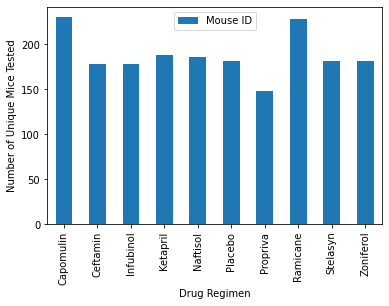

In [191]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen_df = clean_df_reset[["Mouse ID","Drug Regimen"]]
group = regimen_df.groupby("Drug Regimen").count()


plot = group.plot.bar(y="Mouse ID",rot=90)
plot.set_ylabel("Number of Unique Mice Tested")
plt.show()

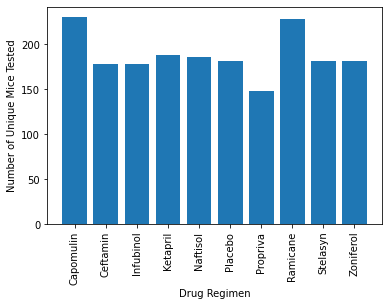

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
group_reset = group.reset_index()
regimen = group_reset["Drug Regimen"]
x_axis = [drug for drug in regimen]
y_axis = [mouse for mouse in group_reset["Mouse ID"]]
plt.bar(x_axis,y_axis)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

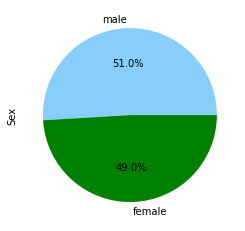

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = clean_df_reset["Sex"].value_counts()
gender_df = pd.DataFrame ({"Sex":[958,922]},
                         index=["male","female"])
colors = ["lightskyblue","green"]
plot = gender_df.plot.pie(y="Sex",figsize=(4,4),colors=colors,autopct="%1.1f%%",legend=None)

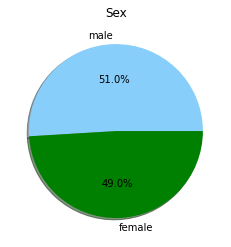

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df = clean_df_reset["Sex"].value_counts()
labels = ["male","female"]
colors = ["lightskyblue","green"]
sex_count = [958,922]
plt.pie(sex_count,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=0,radius=1)
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [133]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint = pd.DataFrame(clean_df_reset.groupby("Mouse ID")[["Timepoint","Drug Regimen"]].max()).reset_index()

max_timepoint = clean_df_reset.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

merged_data = max_timepoint.merge(clean_df_reset,on=['Mouse ID','Timepoint'],how="left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [187]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    drug_regimen = merged_data.loc[merged_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    quartiles = drug_regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr_1_5 = iqr * 1.5
    lower_bound = lowerq - iqr_1_5
    upper_bound = upperq + iqr_1_5 
    print(f"potential outliers: {drug_regimen.loc[(drug_regimen < lower_bound) | (drug_regimen > upper_bound)]}")


# for outlier in potential_outliers.items():

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


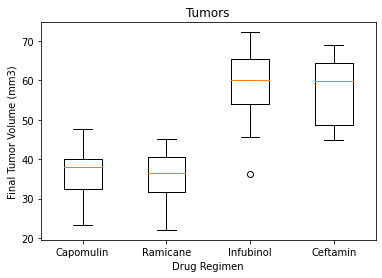

In [189]:
capomulin = merged_data.loc[merged_data["Drug Regimen"]=="Capomulin"]
capomulin_tumor = capomulin["Tumor Volume (mm3)"]

ramicane = merged_data.loc[merged_data["Drug Regimen"]=="Ramicane"]
ramicane_tumor = ramicane["Tumor Volume (mm3)"]

infubinol = merged_data.loc[merged_data["Drug Regimen"]=="Infubinol"]
infubinol_tumor = infubinol["Tumor Volume (mm3)"]

ceftamin = merged_data.loc[merged_data["Drug Regimen"]=="Ceftamin"]
ceftamin_tumor = ceftamin["Tumor Volume (mm3)"]

volume_data_plot = [capomulin_tumor,ramicane_tumor,infubinol_tumor,ceftamin_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(volume_data_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.show()

## Line and Scatter Plots

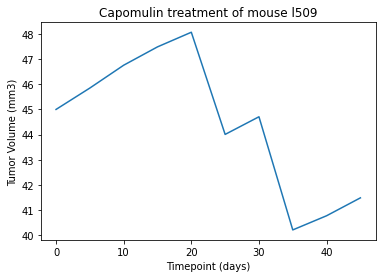

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin=clean_df_reset[clean_df_reset["Drug Regimen"]=="Capomulin"]
mouse_treated = capomulin[capomulin["Mouse ID"]=="l509"]

x_axis_time = [time for time in mouse_treated["Timepoint"]]
y_axis_volume = [volume for volume in mouse_treated["Tumor Volume (mm3)"]]


plt.plot(x_axis_time,y_axis_volume)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


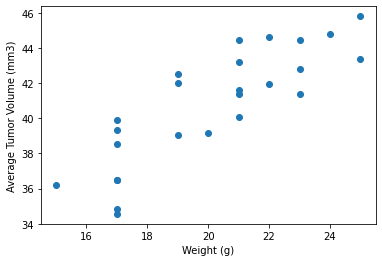

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
combined = combined_df[combined_df["Drug Regimen"]=="Capomulin"]
tumor_volume = pd.DataFrame(combined.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()).reset_index()
weight = pd.DataFrame(combined.groupby("Mouse ID")["Weight (g)"].mean()).reset_index()
merge = pd.merge(tumor_volume,weight,how="left",on="Mouse ID")
                 
weight_list = merge["Weight (g)"]
volume_list = merge["Tumor Volume (mm3)"]

plt.scatter(weight_list, volume_list)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


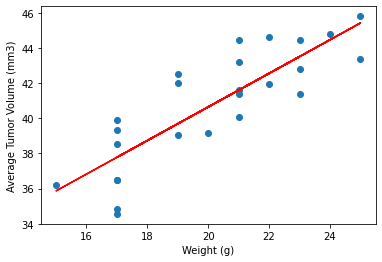

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight_list,volume_list)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.')

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_list, volume_list)
regress_values = weight_list * slope + intercept

plt.scatter(weight_list, volume_list)
plt.plot(weight_list,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()